### 추천시스템
* 구분
    - 컨텐츠기반 필터링(Content-Based Filtering:CB)
        - 사용자가 선택한 컨텐츠와 비슷한 컨텐츠를 추천
        - NLP,태그,주제,작가..등
        - 유사 사용자 추천 방식
        
    - 협업기반 필터링(Collaborative Filtering:CF)
        - 구매 패턴이 비슷 한 사용자 집단으로 가정하고 추천
        
        
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from numpy import dot
from numpy.linalg import norm
# 코사인유사도
# 두 벡터간의 각과  이용하여 유사도 측정
# -1 ~ 1 -1: 반대 취향 1: 적합 취향
def cos_sim(a,b):
    return dot(a,b)/(norm(a)*norm(b))
cosres=cos_sim([1,1],[-1,-1])
print(cosres)

-0.9999999999999998


In [3]:
# 유클리드 유사도
# 두 벡터간의 거리를 이용하여 유사도 측정
def dist(al=[],bl=[]):
    a=np.array(al)
    b=np.array(bl)
    return np.sqrt(np.sum((a-b)**2))
d1=dist([1,1],[-1,-1])
d2=dist([1,1],[1,1])
print(d1,d2)

2.8284271247461903 0.0


In [4]:
## 컨텐츠 기반 필터링
data=[[2,3,None,4,None],
      [1,None,2,None,5],
      [2,4,1,4,1],
      [None,5,1,4,None],
      [3,4,None,4,None]]
cols=['수퍼맨','스파이더맨','원더우먼','헐크','배트맨']
herodf=pd.DataFrame(data,columns=cols)
herodf.head()

,수퍼맨,스파이더맨,원더우먼,헐크,배트맨
0,2.0,3.0,NaN,4.0,NaN
1,1.0,NaN,2.0,NaN,5.0
2,2.0,4.0,1.0,4.0,1.0
3,NaN,5.0,1.0,4.0,NaN
4,3.0,4.0,NaN,4.0,NaN


In [5]:
wdf=herodf.fillna(0)
wdf.head()

,수퍼맨,스파이더맨,원더우먼,헐크,배트맨
0,2.0,3.0,0.0,4.0,0.0
1,1.0,0.0,2.0,0.0,5.0
2,2.0,4.0,1.0,4.0,1.0
3,0.0,5.0,1.0,4.0,0.0
4,3.0,4.0,0.0,4.0,0.0


In [6]:
wval=wdf.iloc[:,:4].values
wval

array([[2., 3., 0., 4.],
       [1., 0., 2., 0.],
       [2., 4., 1., 4.],
       [0., 5., 1., 4.],
       [3., 4., 0., 4.]])

In [7]:
sims=[]
for i in range(len(wval)):
    for j in range(i+1,len(wval)):
        cosres=cos_sim(wval[i],wval[j])
        d=dist(wval[i],wval[j])
        rd=np.round(d)
        cosr=np.round(cosres,2)
        sims.append([cosr,rd])
        print(i,j,':',wval[i],'-',wval[j],':',cosr,',',rd)


0 1 : [2. 3. 0. 4.] - [1. 0. 2. 0.] : 0.17 , 5.0
0 2 : [2. 3. 0. 4.] - [2. 4. 1. 4.] : 0.98 , 1.0
0 3 : [2. 3. 0. 4.] - [0. 5. 1. 4.] : 0.89 , 3.0
0 4 : [2. 3. 0. 4.] - [3. 4. 0. 4.] : 0.99 , 1.0
1 2 : [1. 0. 2. 0.] - [2. 4. 1. 4.] : 0.29 , 6.0
1 3 : [1. 0. 2. 0.] - [0. 5. 1. 4.] : 0.14 , 7.0
1 4 : [1. 0. 2. 0.] - [3. 4. 0. 4.] : 0.21 , 6.0
2 3 : [2. 4. 1. 4.] - [0. 5. 1. 4.] : 0.94 , 2.0
2 4 : [2. 4. 1. 4.] - [3. 4. 0. 4.] : 0.98 , 1.0
3 4 : [0. 5. 1. 4.] - [3. 4. 0. 4.] : 0.87 , 3.0


In [8]:
simdf=pd.DataFrame(sims,columns=['cos','dis'])
simdf.head()

,cos,dis
0,0.17,5.0
1,0.98,1.0
2,0.89,3.0
3,0.99,1.0
4,0.29,6.0


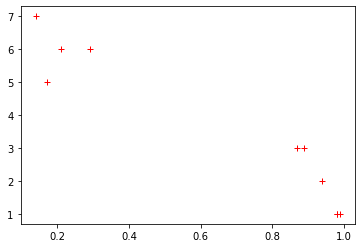

In [9]:
plt.plot(simdf['cos'],simdf['dis'],'r+')